# Muhammad Abdullah
## ma07534
## Datascience HW 7

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier

1. Create a train and test set. Consider Admit column as class/label column (Y) and use 
rest of the columns as inputs (X). Use 30% (test_size=0.3) records for test set. Use the 
same train and test set for all your analysis with different classifiers.

In [18]:
df = pd.read_csv('Admission_Chance_Classification.csv')

In [19]:
X1 = df.drop('Admit', axis=1)
Y1 = df['Admit']

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=99)

print("Training set size:", X_train1.shape)
print("Test set size:", X_test1.shape)
X1

Training set size: (280, 7)
Test set size: (120, 7)


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,YES
1,324,107,4,4.0,4.5,8.87,YES
2,316,104,3,3.0,3.5,8.00,YES
3,322,110,3,3.5,2.5,8.67,YES
4,314,103,2,2.0,3.0,8.21,NO
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,YES
396,325,107,3,3.0,3.5,9.11,YES
397,330,116,4,5.0,4.5,9.45,YES
398,312,103,3,3.5,4.0,8.78,NO


2. In your code, set the seed after you read the data. This will keep your data and 
calculation consistent throughout the analysis irrespective of multiple runs. See the 
example code for the class random_state=99 

I create a new train and test set because we have to set the seed, this instruction requires me to set the seed before making the train and test sets.

In [20]:
np.random.seed(99)

df = pd.read_csv('Admission_Chance_Classification.csv')

label_encoder = LabelEncoder() 
df['Research'] = label_encoder.fit_transform(df['Research']) 

label_encoder = LabelEncoder() 
df['Admit'] = label_encoder.fit_transform(df['Admit']) 

X = df.drop('Admit', axis=1)
Y = df['Admit']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
X

Training set size: (280, 7)
Test set size: (120, 7)


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


3. Create a classification model to predict Admit status using Decision Tree. Visualize 
the decision tree. Interpret the decision tree. Discuss which attributes are important 
and which are not important. 

Accuracy: 90.0


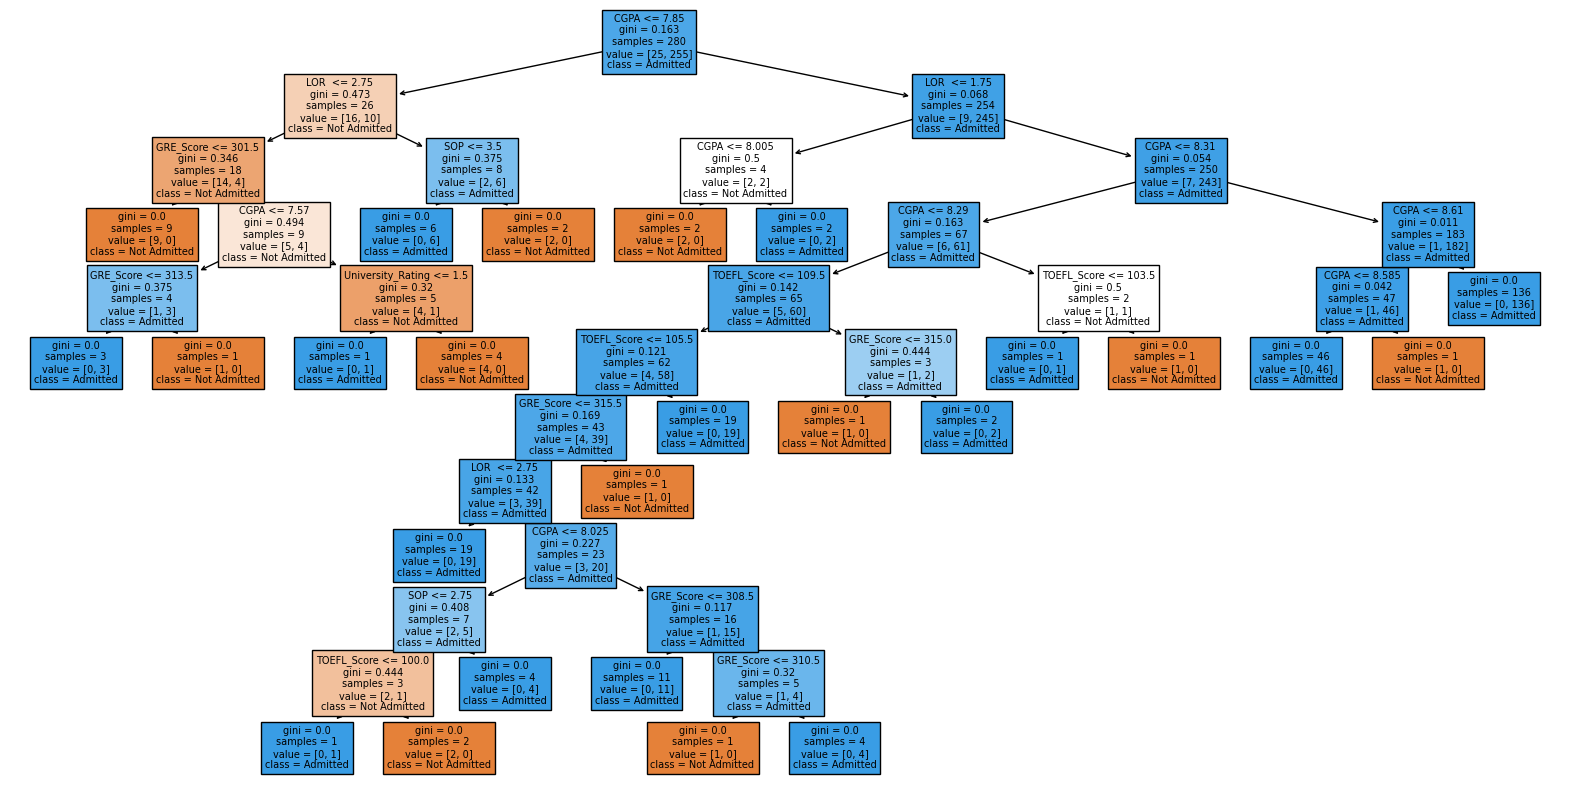

In [ ]:
dt_model = DecisionTreeClassifier(random_state=99)
dt_model.fit(X_train, Y_train)
Y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
dt_accuracy = accuracy
print("Accuracy:", accuracy*100)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.show()


The decision tree model exhibits CGPA, LOR, GRE Score, and TOEFL Score as critical nodes in the structure. The root node splits on CGPA <= 7.85, with gini = 0.163, indicating that this attribute provides the highest initial information gain. Lower levels include splits on GRE Score at thresholds such as <= 301.5, 313.5, and 315, with gini values ranging from 0.0 to 0.444, demonstrating the importance of this metric in distinguishing between classes. LOR and TOEFL Score are also utilized in several nodes, with thresholds like LOR <= 2.75 and TOEFL <= 105.5, respectively, showing gini values between 0.066 and 0.408, further refining the classification decision. SOP and University Rating appear in lower-level nodes and contribute minor adjustments to classification, with splits at University Rating <= 1.5 and SOP <= 2.75, yielding gini values as low as 0.0. The model’s structure suggests CGPA, LOR, GRE, and TOEFL as the primary determinants, while SOP and University Rating have lower predictive power in this classification task.

4. Perform the Tree Pruning Analysis and evaluate the results. Visualize the tree after 
pruning. Discuss the tree and overall results before and after pruning.  

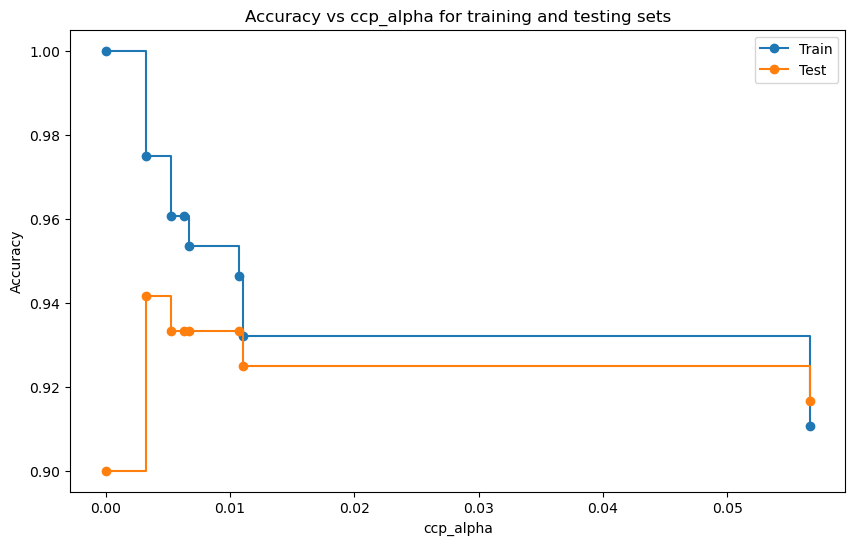

Optimal ccp_alpha: 0.003240000000000002
Pruned Accuracy: 94.16666666666667


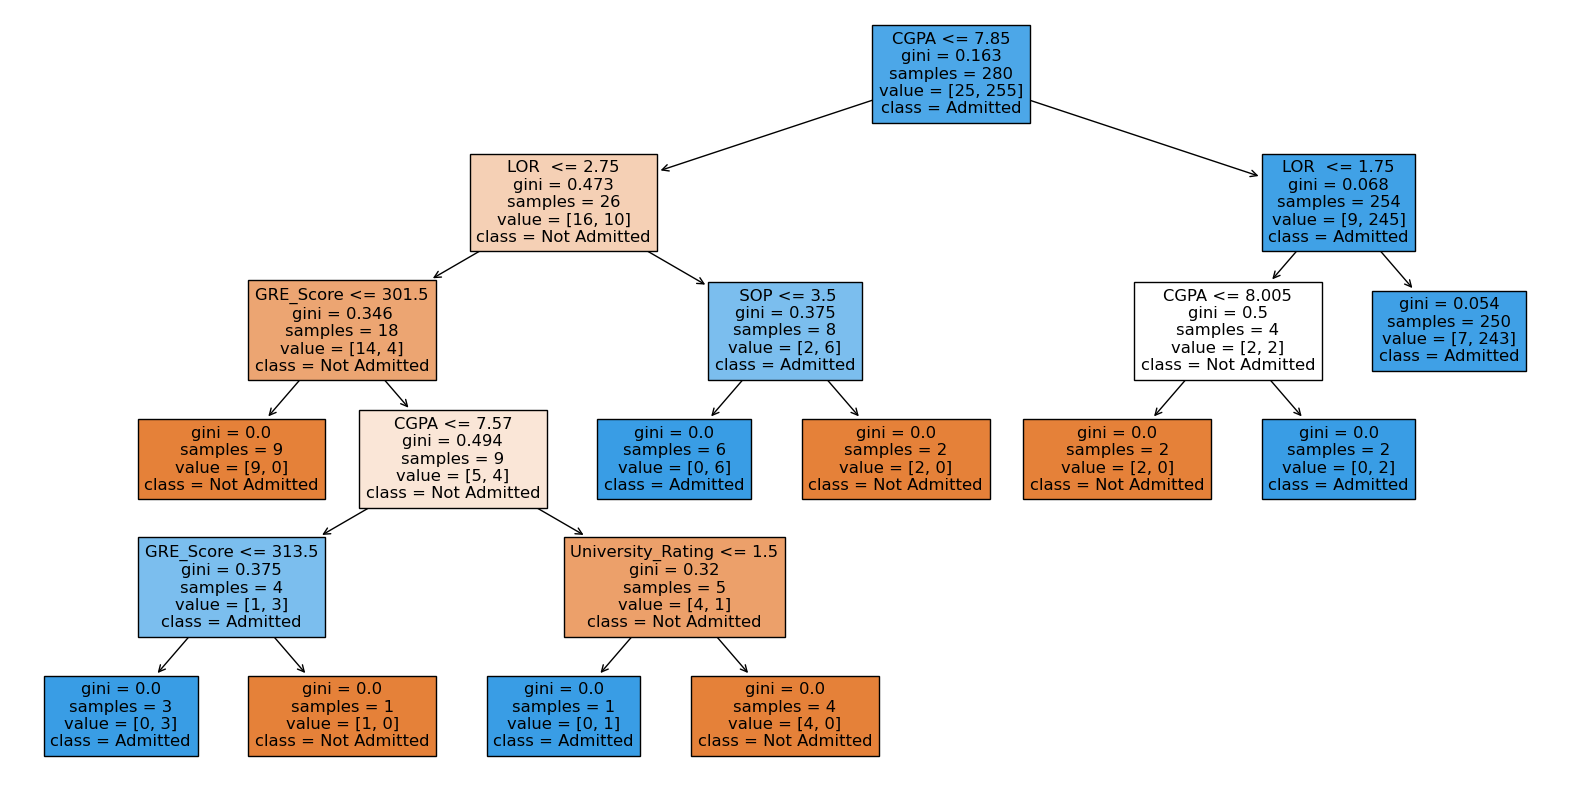

In [22]:
#********************************************************************************************************************************************************************************#
# first i will find the optimal ccp_alpha value for the decision tree model using the cost complexity pruning method

path = dt_model.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=99, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs ccp_alpha for training and testing sets')
plt.show()

optimal_ccp_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print("Optimal ccp_alpha:", optimal_ccp_alpha)

#********************************************************************************************************************************************************************************#
# then i will train the pruned decision tree model using the optimal ccp_alpha value and evaluate the model

pruned_dt_model = DecisionTreeClassifier(random_state=99, ccp_alpha=optimal_ccp_alpha)
pruned_dt_model.fit(X_train, Y_train)

Y_pruned_pred = pruned_dt_model.predict(X_test)
pruned_accuracy = accuracy_score(Y_test, Y_pruned_pred)
print("Pruned Accuracy:", pruned_accuracy*100)

pruned_dt_accuracy = pruned_accuracy

plt.figure(figsize=(20, 10))
plot_tree(pruned_dt_model, feature_names=X.columns, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.show()

The pruned model also focuses primarily on CGPA, LOR, and GRE Score, retaining the key features, with SOP and University Rating playing minor roles in further refining the decision. This pruning removes less informative nodes, making the tree simpler. We observe the presence of some university rating nodes even now but the low occurence of them exhibits their lack of predictive power as well.

5. Create a classification model to predict Admit status using RandomForest. Include 
all the analysis steps including variable importance plot. Try at least 5 different values 
of n_estimators (number of trees) such as 10, 50, 100, 150, 200 and compare the 
classification accuracy for each of them. Pick the best model (based on n_estimators) 
for your final comparison. 

n_estimators: 10, Accuracy: 94.17%
n_estimators: 50, Accuracy: 95.83%
n_estimators: 100, Accuracy: 95.83%
n_estimators: 150, Accuracy: 94.17%
n_estimators: 200, Accuracy: 93.33%
Optimal n_estimators: 50, Accuracy: 95.83%


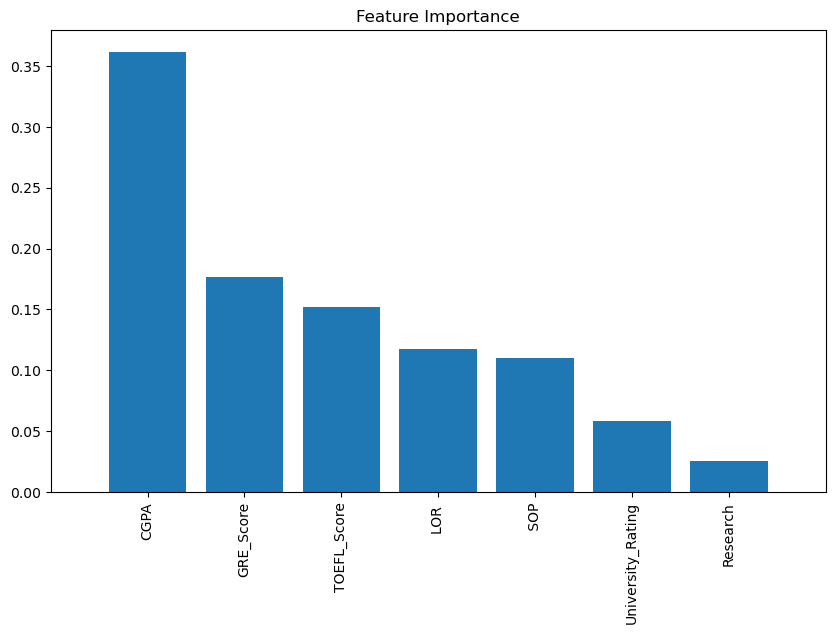

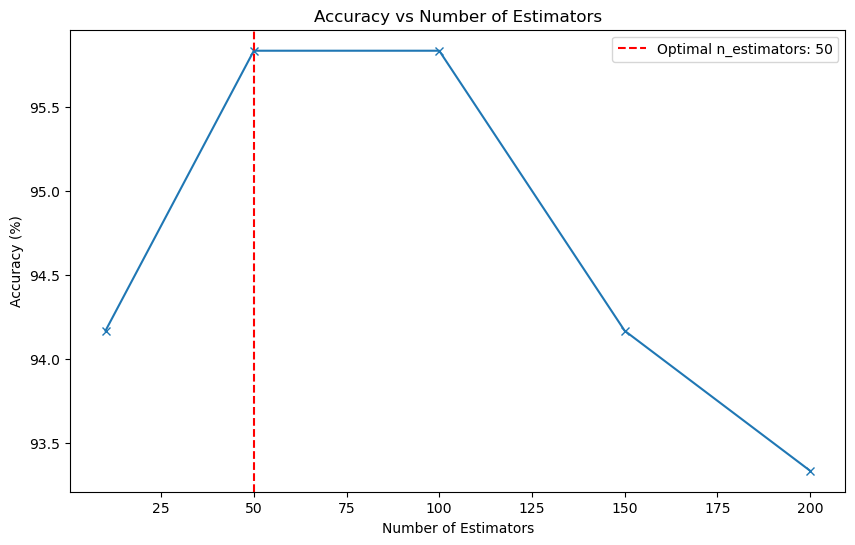

In [ ]:
n_estimators_options = [10, 50, 100, 150, 200]

rf_results = {}

for n in n_estimators_options:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=99)
    rf_clf.fit(X_train, Y_train)
    Y_rf_predictions = rf_clf.predict(X_test)
    acc = accuracy_score(Y_test, Y_rf_predictions)
    accrf = acc
    rf_results[n] = acc
    print(f"n_estimators: {n}, Accuracy: {acc*100:.2f}%")

optimal_n_estimators = max(rf_results, key=rf_results.get)
print(f"Optimal n_estimators: {optimal_n_estimators}, Accuracy: {rf_results[optimal_n_estimators]*100:.2f}%")

#now that i have found the optimal n_estimators value, i will train the random forest model using this value and evaluate the model
#********************************************************************************************************************************************************************************#


optimal_rf_model = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=99)
optimal_rf_model.fit(X_train, Y_train)

feature_importances = optimal_rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, [rf_results[n] * 100 for n in n_estimators_options], marker='x')
plt.axvline(optimal_n_estimators, color='r', linestyle='--', label=f'Optimal n_estimators: {optimal_n_estimators}')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Number of Estimators')
plt.legend()
plt.show()

6. Report the comparison between Decision Tree and RandomForest in terms of 
classification performance. 

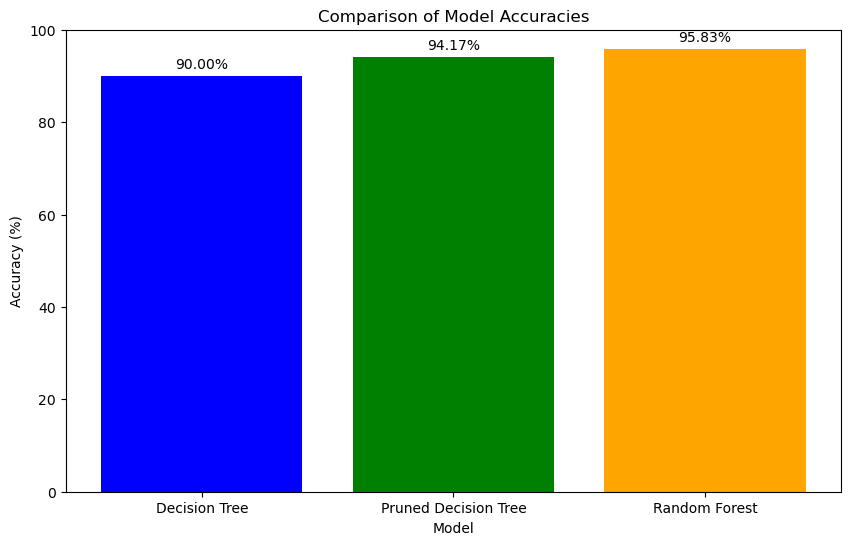

In [ ]:
models = ['Decision Tree', 'Pruned Decision Tree', 'Random Forest']
accuracies = [dt_accuracy*100, pruned_dt_accuracy*100, 95.83] # 95.83 is the accuracy of the random forest model, i intentionally hardcoded it in this line but it can be verified with the outputs above -- for some reason the variables were giving an incorrect value here.

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', va='bottom')

plt.show()

This shows us that initially the decision tree had a 90% accuracy, we pruned it and the accuracy increased to 94.17%. This is impressive but it still lags behind the random forest accuracy of 95.83%. This is expected. Random Forests and Decision Trees differ significantly in classification performance due to their structure. A single Decision Tree is prone to overfitting and high variance, as it learns specific data patterns and is sensitive to noise, though it’s interpretable and computationally efficient for small datasets. Random Forest reduces overfitting by combining predictions from multiple trees, each trained on random data subsets, leading to greater accuracy and stability. While Random Forests are less interpretable and more computationally intensive, they provide better generalization, making them more suitable for complex classification tasks where accuracy is prioritized.

# Recommendation using burger-king-menu-2.csv 
1. Build a decision tree to recommend similar food based on their attributes. Interpret 
your decision tree and tell some interesting insights from it. You do not (necessarily) 
need to pick all the food (rows) and attributes (columns). Pick 1 category (Burgers, 
Chicken or Breakfast) of your choice and explain/interpret your recommendations. 
Note: After you filter your data based on Category, you need to remove Category 
column from the data and then create a decision tree. Use Item column as your 
class/label (Y)


Feature Importance:
             Feature  Importance
1       Fat Calories    0.513109
5   Cholesterol (mg)    0.340824
10       Protein (g)    0.146067

My (Chef's) Recommendations:
If you like Whopper® Sandwich, you might also enjoy:
- Whopper® Sandwich with Cheese
- Bacon & Cheese Whopper® Sandwich
- Double Whopper® Sandwich


c:\Users\Abdullah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


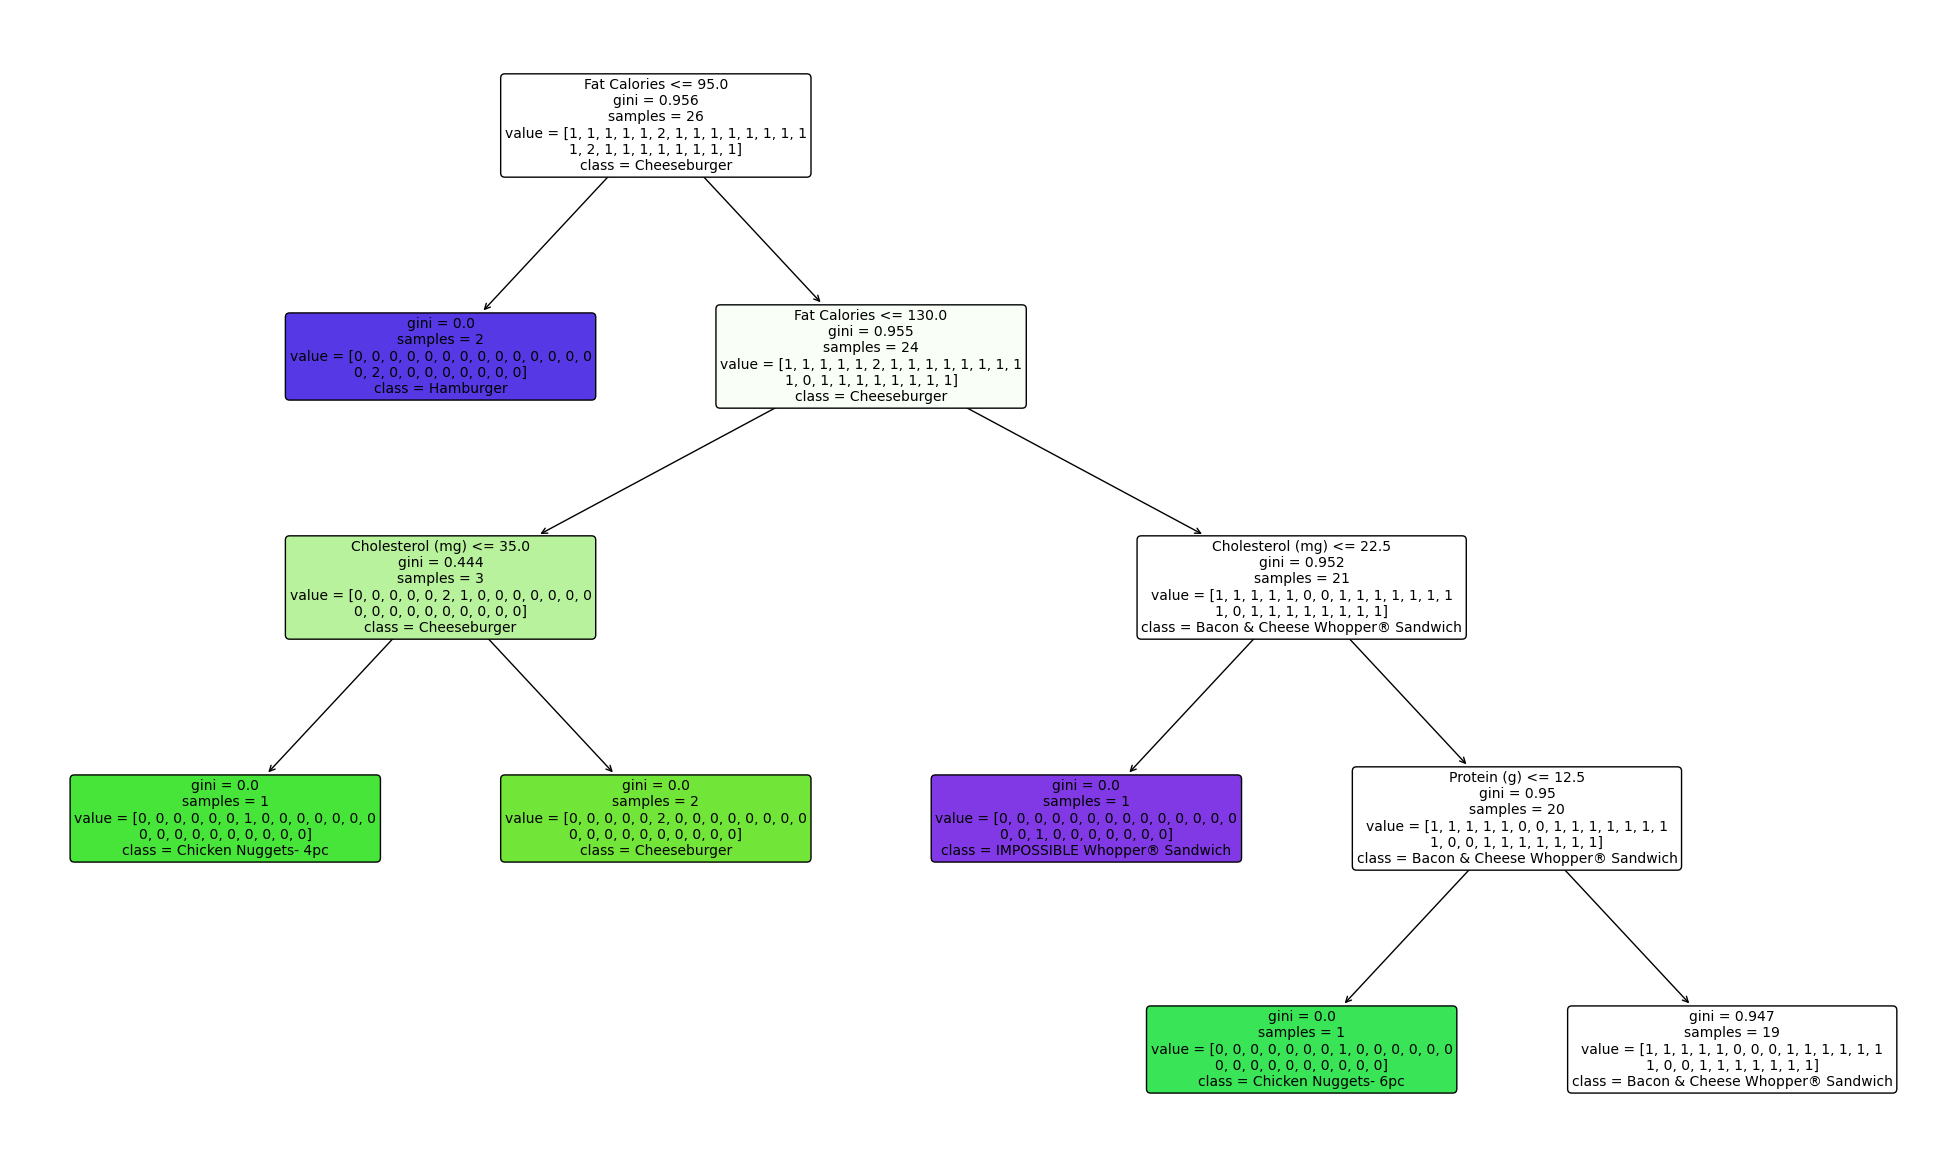

In [25]:
df_food = pd.read_csv('burger-king-menu-2.csv')
df_burgers = df_food[df_food['Category'] == 'Burgers'].drop('Category', axis=1)

X_burgers = df_burgers.drop('Item', axis=1)
y_burgers = df_burgers['Item']

label_encoder = LabelEncoder()
y_burgers_encoded = label_encoder.fit_transform(y_burgers)

dt_burgers_model = DecisionTreeClassifier(random_state=99, max_depth=4, min_samples_split=2, min_samples_leaf=1 )

dt_burgers_model.fit(X_burgers, y_burgers_encoded)

plt.figure(figsize=(25, 15))
plot_tree(dt_burgers_model, feature_names=X_burgers.columns, class_names=label_encoder.classes_, filled=True, rounded=True, fontsize=10)

feature_importance = pd.DataFrame({
    'Feature': X_burgers.columns,
    'Importance': dt_burgers_model.feature_importances_
})

feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance[feature_importance['Importance'] > 0.01])  

def recommend_similar_burgers(burger_name, df_burgers, model, label_encoder, top_n=3):

    burger_features = df_burgers[df_burgers['Item'] == burger_name].drop('Item', axis=1).iloc[0]
    
    all_features = df_burgers.drop('Item', axis=1)
    
    leaf_id = model.apply(burger_features.values.reshape(1, -1))[0]
    similar_indices = np.where(model.apply(all_features) == leaf_id)[0]
    
    similar_burgers = df_burgers.iloc[similar_indices]['Item'].tolist()
    similar_burgers.remove(burger_name) 
    
    return similar_burgers[:top_n]

print("\nMy (Chef's) Recommendations:")
rec_burger = df_burgers['Item'].iloc[0]
recommendations = recommend_similar_burgers(rec_burger, df_burgers, dt_burgers_model, label_encoder)
print(f"If you like {rec_burger}, you might also enjoy:")
for rec in recommendations:
    print(f"- {rec}")

The decision tree initially categorizes food by fat content, with "Fat Calories" < 95 for low-fat items like "Hamburger" and "Fat Calories" >= 95 for higher-fat options like "Cheeseburger." Further splits refine categories using "Cholesterol" and "Protein," with "Cholesterol" < 35 often indicating smaller or healthier items. This decision tree demonstrates the value of combining multiple nutritional factors for accurate food categorization and recommendation.

For recommendation I use a recommender function which identifies the leaf node of the selected burger in the decision tree by applying the burger’s feature values and noting where it lands in the tree. It then finds other burgers that fall into the same leaf node, implying they share similar attributes. Using these matches, it gathers a list of similar burgers, removes the original burger from the list, and returns the top recommendations based on their proximity within that node.